In [42]:
import pandas as pd
import os

In [131]:
filename = wget.download('https://query.data.world/s/kw6kgst4azjlggqe7nw4k3t6a67wok')
dfAll= pd.read_csv(filename)
dfAll = dfAll.assign(timestamp=dfAll.Date.apply(lambda x: pd.Timestamp(x)))
dfAll = dfAll.sort_values(by=['timestamp'])
os.remove(filename)
 

In [163]:
class corona(object):
    dfAll = dfAll
   
    @classmethod
    def all(cls):
        return cls.dfAll
    
    @classmethod
    def us_states(cls, case_type):
        df = cls.dfAll[(cls.dfAll.Country_Region == 'US') & (cls.dfAll.Case_Type == case_type)]
        base = None
        states = df.Province_State.unique()
        for state in states:
            tmp = df[(df.Province_State==state)].groupby(['Date']).Cases.sum()
            tmp = pd.DataFrame(tmp)
            tmp = tmp.rename(columns={'Cases': state})
            if base is None:
                base = tmp
            else:
                base = base.join(tmp)
        return base
    

    @classmethod
    def countries(cls, case_type):
        df = cls.dfAll[cls.dfAll.Case_Type == case_type]
        base = None
        states = df.Country_Region.unique()
        for state in states:
            tmp = df[(df.Country_Region==state)].groupby(['Date']).Cases.sum()
            tmp = pd.DataFrame(tmp)
            tmp = tmp.rename(columns={'Cases': state})
            if base is None:
                base = tmp
            else:
                base = base.join(tmp)
        return base
    

In [185]:
df = corona.countries('Confirmed')

In [186]:
import os
from plotly.subplots import make_subplots
import numpy as np
import plotly.graph_objects as go
import plotly
hex_colors = [
    '#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2',
    '#7f7f7f','#bcbd22','#17becf','#7f0000','#000000','#04ab08','#0000fb',
]

In [187]:
fig = go.Figure()

for col in df.columns:
    fig.add_trace( go.Scatter( x=df.index, y=df[col], mode='lines+markers' ) )

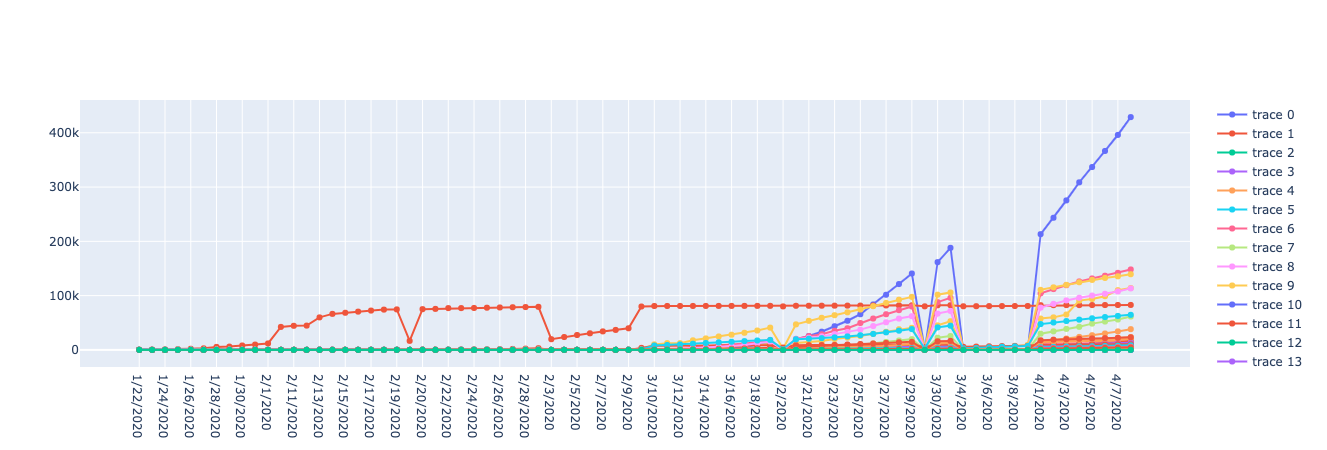

In [188]:
fig

In [184]:
df[(df.index == '3/6/2020')].sum()

Iowa                         0
Indiana                      1
North Carolina               2
Tennessee                    1
Kansas                       0
Texas                        4
Illinois                     5
Michigan                     0
Virginia                     0
Colorado                     3
Arkansas                     0
North Dakota                 0
Montana                      0
West Virginia                0
Kentucky                     1
Wyoming                      0
Pennsylvania                 2
Washington                  78
Minnesota                    1
South Dakota                 0
Alabama                      0
Florida                      3
Ohio                         0
New Jersey                   2
Louisiana                    0
Oregon                       3
Georgia                      3
Missouri                     0
Nebraska                     1
Wisconsin                    0
New Mexico                   0
South Carolina               0
Idaho   